# Final Project Description: Predicting Rain Tomorrow in Australia

### Introduction:
In this final project, you will explore the machine learning techniques by
tackling a real-world problem: predicting whether it will rain tomorrow in various
locations across Australia. Weather forecasting is a crucial application of machine
learning, with far-reaching implications for agriculture, transportation, and public safety.
By the end of this project, you will have built and evaluated several classification models,
honing your skills in preprocessing, model selection, and interpretation of results.

### Dataset Description
The dataset provided contains approximately 10 years of daily
weather observations from multiple locations across Australia. Each observation includes
various features such as temperature, humidity, wind speed, and rainfall. The target
variable, RainTomorrow, indicates whether it rained the following day, with a binary
classification of "Yes" or "No". Specifically, if the rainfall for a given day exceeds 1mm,
RainTomorrow is labeled as "Yes".

# Packages
 

In [37]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Data Loading and Preprocessing:
* Load the Aus dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [38]:
# Read the data
X_test = pd.read_csv("D:\Mitt\Documents\GitHub\Australia-Rain-Prediction\weatherAUS_X_test.csv", delimiter=',')
X_train = pd.read_csv("D:\Mitt\Documents\GitHub\Australia-Rain-Prediction\weatherAUS_X_train.csv", delimiter=',')
y_test = pd.read_csv("D:\Mitt\Documents\GitHub\Australia-Rain-Prediction\weatherAUS_y_test.csv", delimiter=',')
y_train = pd.read_csv("D:\Mitt\Documents\GitHub\Australia-Rain-Prediction\weatherAUS_y_train.csv", delimiter=',')

# Drop 'Date' and 'Location' from encoded datasets
X_train.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], errors='ignore', inplace=True)
X_test.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], errors='ignore', inplace=True)

# Get numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Drop missing values from feature datasets
X_train_cleaned = X_train.dropna(subset=numerical_features.tolist() + ['RainToday'])
X_test_cleaned = X_test.dropna(subset=numerical_features.tolist() + ['RainToday'])

# Convert 'Yes'/'No' to Binary values in cleaned datasets for 'RainToday'
X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})

# Get the categorical columns
categorical_cols = X_train_cleaned.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns in both training and testing datasets
X_train_encoded = pd.get_dummies(X_train_cleaned, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test_cleaned, columns=categorical_cols)

# Ensure both datasets have the same dummy variables, filling with 0 where categories do not match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Align Y_train and Y_test with the indices of cleaned and encoded feature datasets
y_train_aligned = y_train.loc[X_train_encoded.index].copy()
y_test_aligned = y_test.loc[X_test_encoded.index].copy()

# Convert 'Yes'/'No' to Binary values in Y_train_aligned and Y_test_aligned
y_train_aligned['RainTomorrow'] = y_train_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test_aligned['RainTomorrow'] = y_test_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Drop any remaining missing values in the target datasets
y_train_aligned.dropna(subset=['RainTomorrow'], inplace=True)
y_test_aligned.dropna(subset=['RainTomorrow'], inplace=True)

# Assign it back to y_train and y_test for better interpretations
y_train = y_train_aligned
y_test = y_test_aligned

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Realign the feature datasets to match the new indices of the target datasets
X_train_encoded = X_train_encoded.loc[y_train_aligned.index]
X_test_encoded = X_test_encoded.loc[y_test_aligned.index]

# Combine the datasets for a single dataframe
# Combine training X and Y datasets
combined_train_df = pd.concat([X_train_encoded, y_train_aligned], axis=1)

# Combine test X and Y datasets
combined_test_df = pd.concat([X_test_encoded, y_test_aligned], axis=1)

# Combine training and test DataFrames
rain = pd.concat([combined_train_df, combined_test_df], ignore_index=True)

# Get feature names
features = X_train_encoded.columns

# Standardize the feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Print shapes of the datasets
print("Shapes of the datasets:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)


Shapes of the datasets:
X_train: (46430, 17)
X_test: (11660, 17)


C:\Users\Mitt\AppData\Local\Temp\ipykernel_5912\2144073766.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
C:\Users\Mitt\AppData\Local\Temp\ipykernel_5912\2144073766.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})


### Show the data

In [27]:
X_train_encoded

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2,14.7,26.6,0.2,3.2,8.0,30.0,7.0,11.0,87.0,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,0
5,4.9,10.3,0.0,0.6,1.2,26.0,9.0,15.0,67.0,68.0,1030.2,1026.0,8.0,8.0,7.8,9.6,0
7,3.5,17.2,0.0,1.6,8.8,30.0,0.0,7.0,87.0,39.0,1030.7,1026.3,1.0,1.0,8.0,16.9,0
9,22.3,27.6,11.6,9.4,0.4,43.0,19.0,24.0,94.0,91.0,1016.4,1015.2,7.0,8.0,22.7,24.5,1
13,20.8,29.0,0.0,9.4,7.5,26.0,7.0,9.0,57.0,61.0,1016.4,1012.6,7.0,4.0,27.4,27.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116361,-0.5,20.0,0.0,3.8,10.1,33.0,6.0,17.0,59.0,24.0,1026.3,1021.3,0.0,0.0,9.6,19.1,0
116364,7.7,21.1,0.0,1.4,8.9,35.0,15.0,9.0,69.0,43.0,1026.7,1023.0,1.0,1.0,12.3,20.1,0
116365,7.6,21.7,0.0,6.0,11.2,39.0,6.0,17.0,85.0,42.0,1021.1,1019.6,2.0,2.0,13.7,21.2,0
116366,8.8,14.8,0.0,1.2,2.0,56.0,19.0,28.0,56.0,62.0,998.7,990.9,3.0,7.0,14.1,13.6,0


### Info

In [28]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46430 entries, 2 to 116367
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        46430 non-null  float64
 1   MaxTemp        46430 non-null  float64
 2   Rainfall       46430 non-null  float64
 3   Evaporation    46430 non-null  float64
 4   Sunshine       46430 non-null  float64
 5   WindGustSpeed  46430 non-null  float64
 6   WindSpeed9am   46430 non-null  float64
 7   WindSpeed3pm   46430 non-null  float64
 8   Humidity9am    46430 non-null  float64
 9   Humidity3pm    46430 non-null  float64
 10  Pressure9am    46430 non-null  float64
 11  Pressure3pm    46430 non-null  float64
 12  Cloud9am       46430 non-null  float64
 13  Cloud3pm       46430 non-null  float64
 14  Temp9am        46430 non-null  float64
 15  Temp3pm        46430 non-null  float64
 16  RainToday      46430 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 6.4 MB


### Describe

In [29]:
X_train_encoded.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.000000,46430.00000,46430.000000
mean,13.353386,24.141010,2.142882,5.436117,7.698156,40.568103,15.241762,19.586000,66.256601,49.736054,1017.311428,1014.855326,4.249623,4.324467,18.099031,22.64196,0.219621
std,6.469571,6.972494,7.036461,3.657304,3.765414,13.395406,8.575876,8.551506,18.600302,20.197692,6.934851,6.902719,2.804702,2.652467,6.610664,6.83326,0.413994
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-0.900000,3.70000,0.000000
25%,8.500000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.900000,17.30000,0.000000
50%,13.100000,23.800000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.200000,1014.800000,5.000000,5.000000,17.700000,22.30000,0.000000
75%,18.300000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.900000,1019.500000,7.000000,7.000000,23.200000,27.80000,0.000000
max,31.400000,47.300000,183.000000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,45.80000,1.000000


### Columns

In [30]:
X_train_encoded.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

### Plot from https://www.kaggle.com/code/mohamedbakrey/clean-visualization-rain-in-australia/notebook

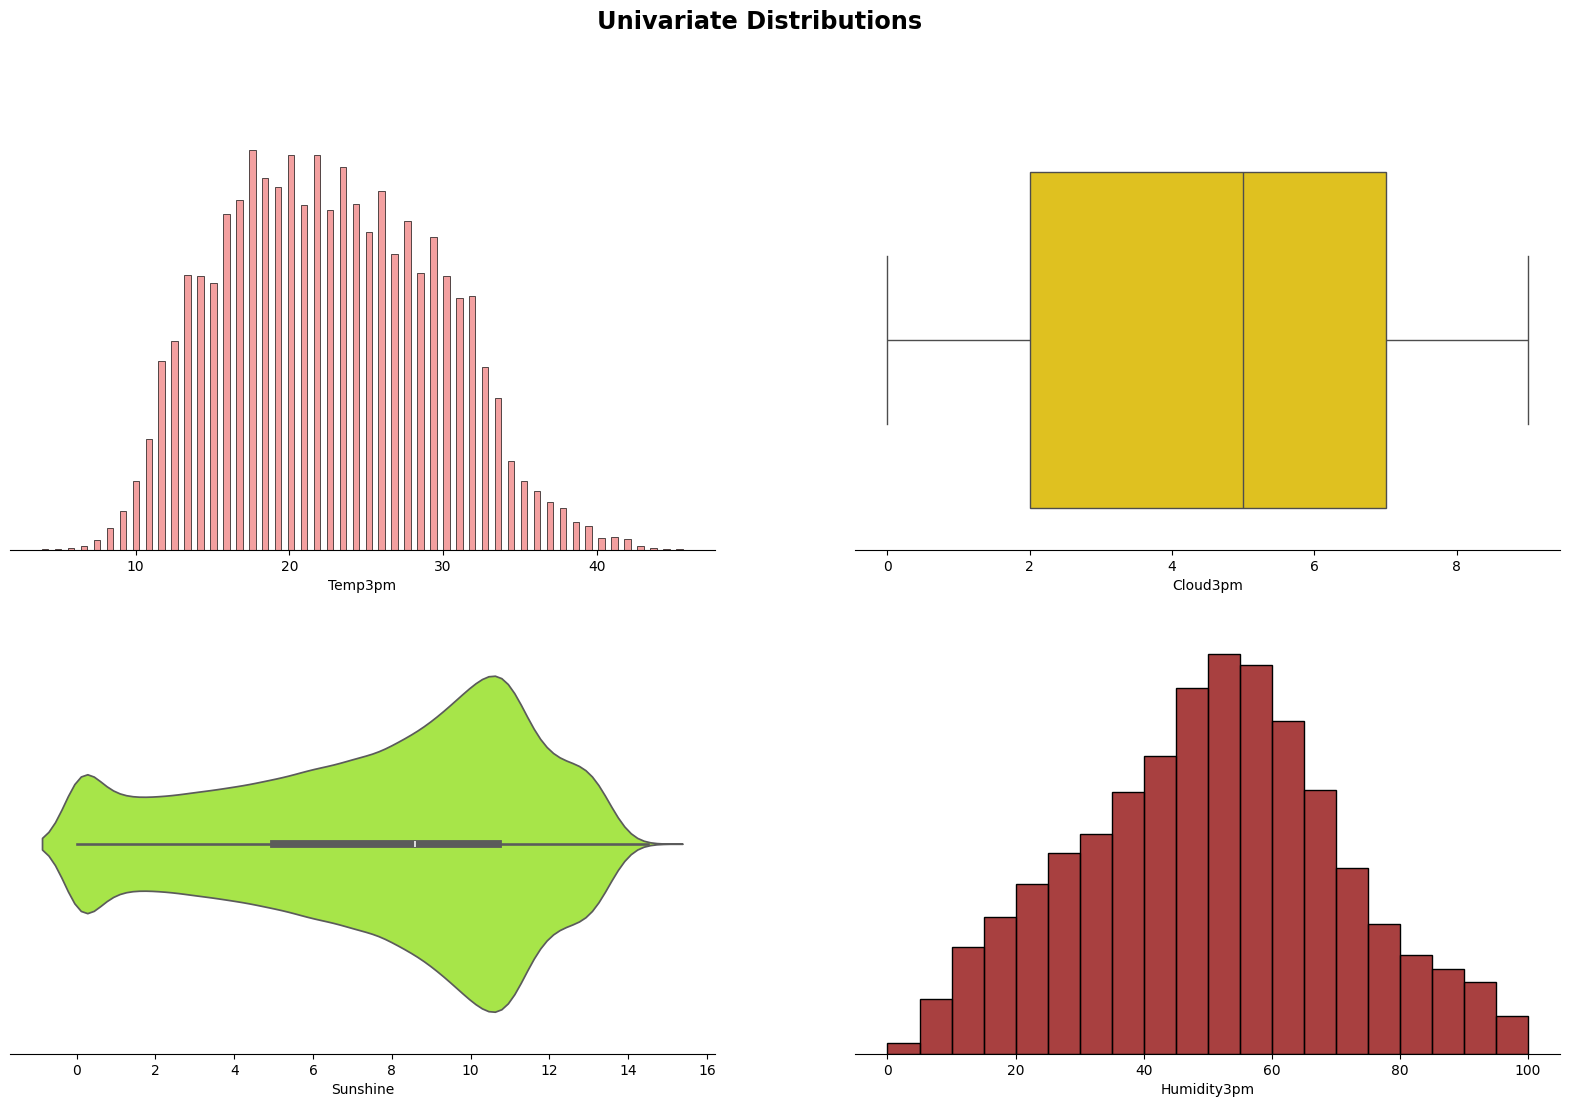

In [31]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Univariate Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="Temp3pm", data=X_train_encoded, ax=ax[0], shrink=0.5, bins=50, color="lightcoral")
sns.histplot(x="Humidity3pm", data=X_train_encoded, ax=ax[3], bins=20, color='darkred')
sns.boxplot(x='Cloud3pm', data=X_train_encoded, ax=ax[1], color='gold')
sns.violinplot(x="Sunshine", data=X_train_encoded, ax=ax[2], color="greenyellow")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

### Making a plot to show relationship between 2 features
Source: https://www.kaggle.com/code/mohamedbakrey/clean-visualization-rain-in-australia/notebook

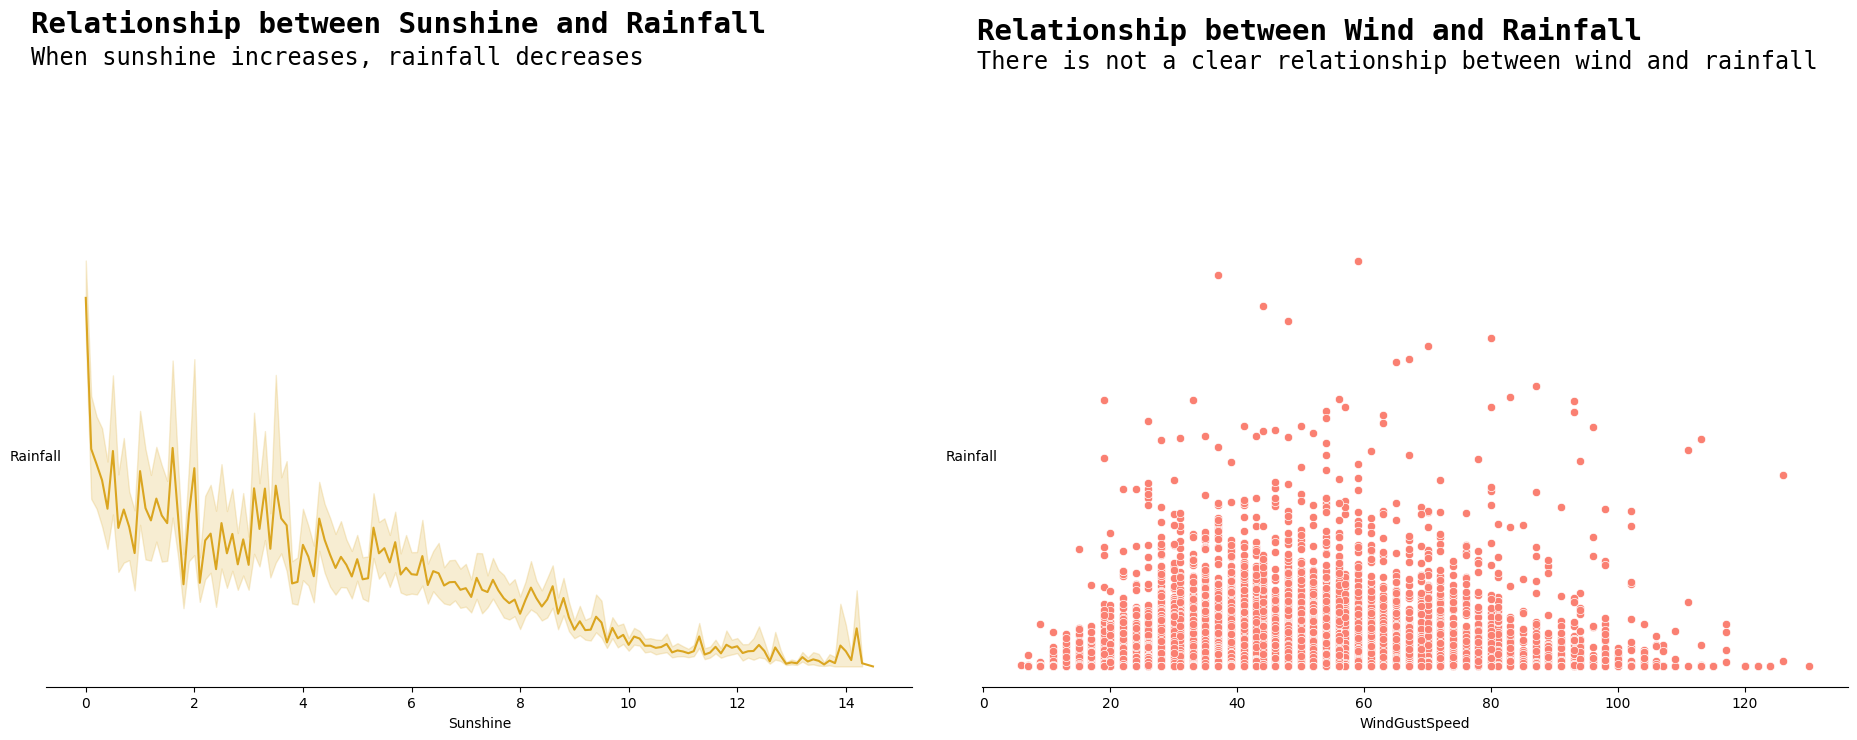

In [32]:
fig=plt.figure(figsize=(20,12),facecolor='white')

gs=fig.add_gridspec(2,2)

ax=[_ for _ in range(4)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,20,"Relationship between Sunshine and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-1,19,"When sunshine increases, rainfall decreases",fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(-1,430,"Relationship between Wind and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-1,410,"There is not a clear relationship between wind and rainfall",fontsize=17,fontweight='light', fontfamily='monospace')

sns.lineplot(data=X_train,x='Sunshine',y='Rainfall',ax=ax[0],color='goldenrod')
sns.scatterplot(data=X_train,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='salmon')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

## Relationship between different features and the target label (RainTomorrow)

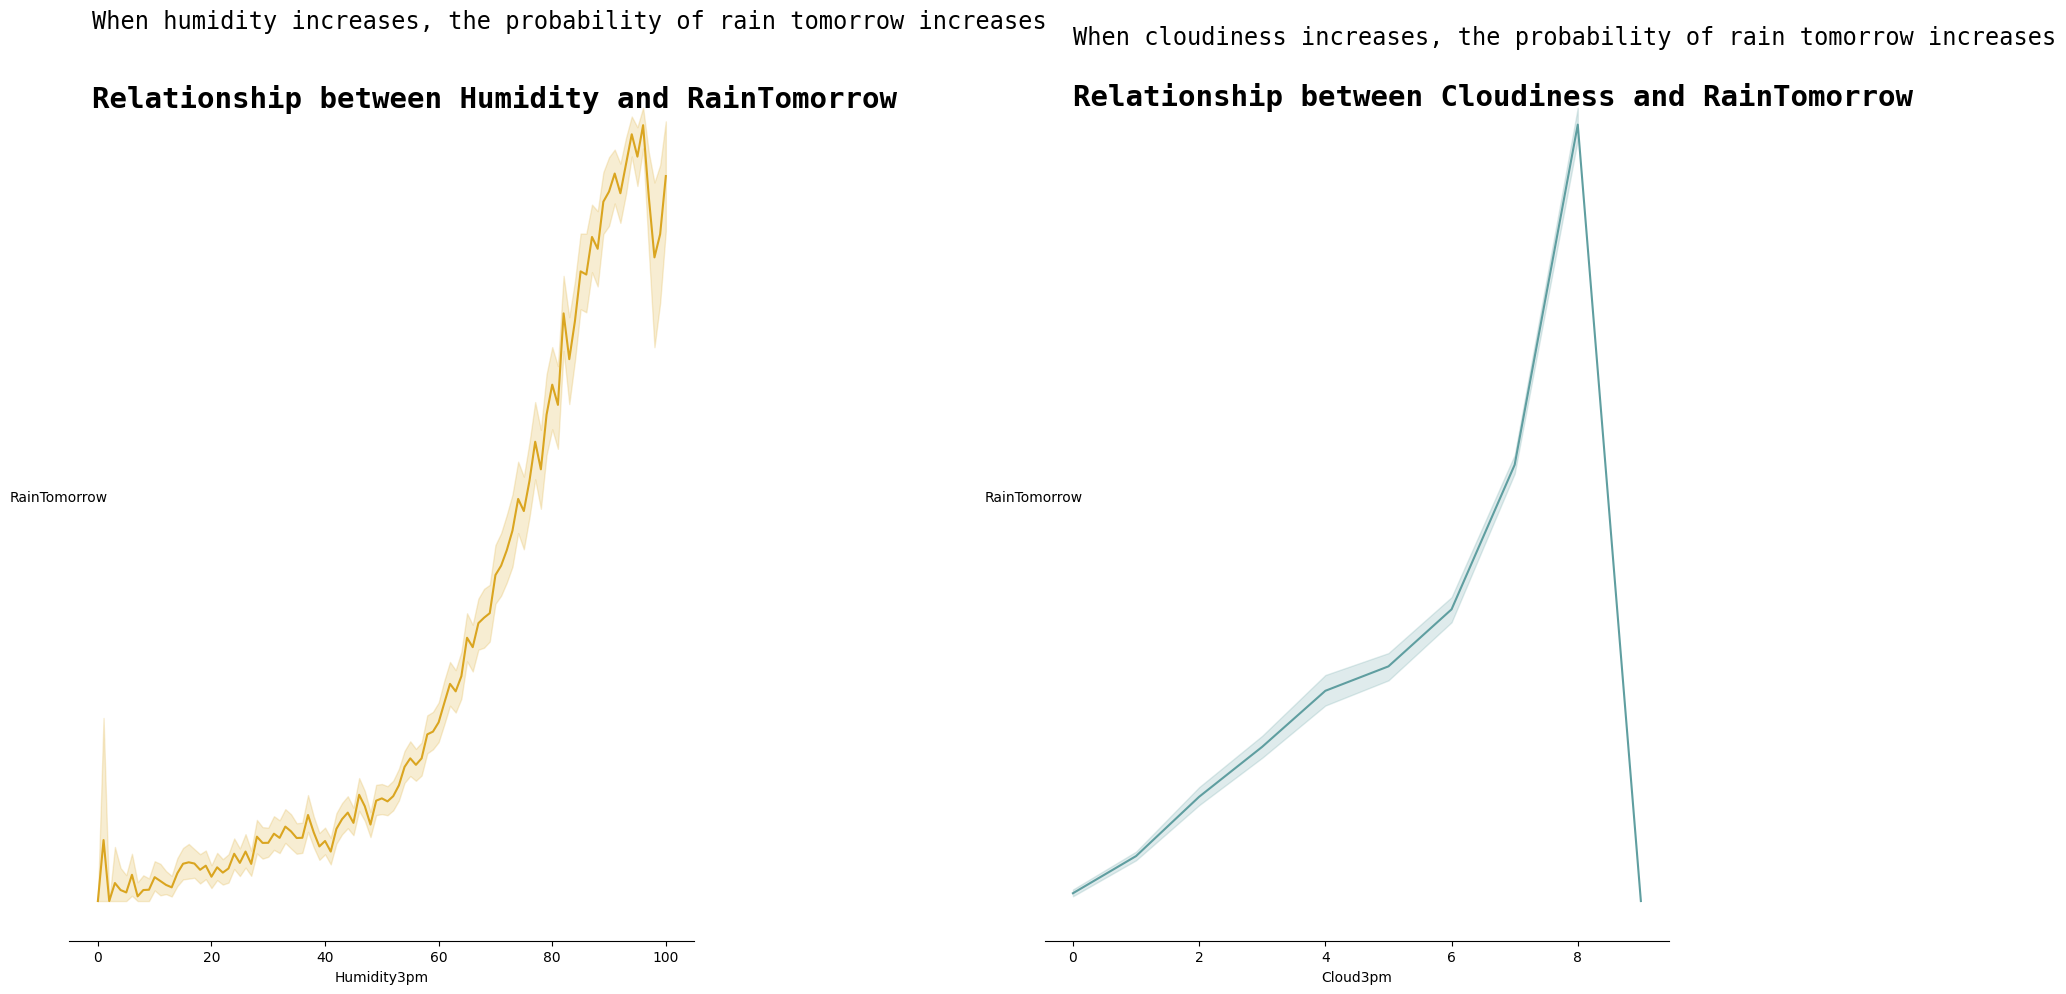

In [61]:
fig = plt.figure(figsize=(20,10),facecolor='white')
gs = fig.add_gridspec(1,2)

ax = [_ for _ in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

ax[0].text(-1, 1,"Relationship between Humidity and RainTomorrow",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-1, 1.1,"When humidity increases, the probability of rain tomorrow increases",fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(0,0.65,"Relationship between Cloudiness and RainTomorrow",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(0,0.7,"When cloudiness increases, the probability of rain tomorrow increases",fontsize=17,fontweight='light', fontfamily='monospace')

sns.lineplot(data=rain,x='Humidity3pm',y='RainTomorrow',ax=ax[0],color='goldenrod')
sns.lineplot(data=rain,x='Cloud3pm',y='RainTomorrow',ax=ax[1],color='cadetblue')

for i in range(2):
    
    ax[i].set_ylabel('RainTomorrow').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

# Dimensionality Reduction: PCA

List of retained principal components
[0.3313675  0.2144039  0.12606282 0.07085851 0.05734171 0.04443037
 0.028426   0.0253427  0.0240205  0.02275839 0.01819267 0.01520785
 0.01260537 0.00527509 0.00171184 0.00140768 0.00058712]
17



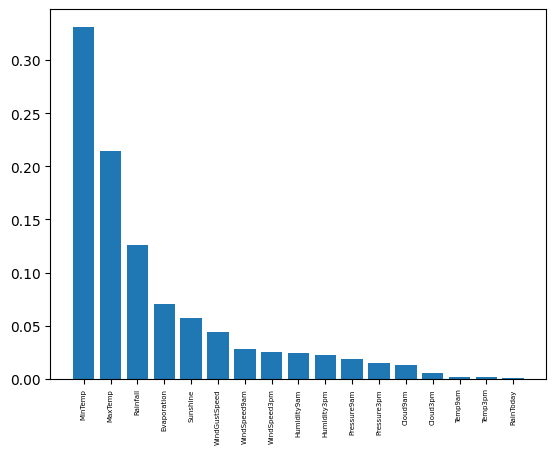

<Figure size 1000x1200 with 0 Axes>

Cumulative sum of variance ratios
[0.3313675  0.5457714  0.67183422 0.74269273 0.80003444 0.84446481
 0.87289081 0.8982335  0.92225401 0.94501239 0.96320506 0.9784129
 0.99101828 0.99629337 0.9980052  0.99941288 1.        ]

Explained variance ratio of each principal component:
[0.3313675  0.2144039  0.12606282 0.07085851 0.05734171 0.04443037
 0.028426   0.0253427  0.0240205  0.02275839]

Summary:
PCA captures 94.5012391358473% of the variance with 10 components.
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm'],
      dtype='object')


In [34]:
# Dimensionality Reduction using PCA
# Apply PCA
"""Initialize PCA with a default value which is the total number of components"""
pca = PCA()
std_pca = pca.fit_transform(X_train_scaled)

# Determine the number of principal components to retain
retain = pca.explained_variance_ratio_
print("List of retained principal components")
print(retain)
print(len(retain))
print()

# Plot explained variance ratio

"""Makes a list of numbers to label the x-axis"""
x_label = []
for i in range(retain.size):
    x_label.append(i)

plt.bar(features, retain)
plt.xticks(rotation=90, fontsize=5)
plt.figure(figsize=(10, 12))
plt.show()

# Choose the number of components based on the explained variance ratio
"""This shows what number of components we need with the threshold of 0.95"""
print("Cumulative sum of variance ratios")
Cum_sum_pca = pca.explained_variance_ratio_.cumsum()
print(Cum_sum_pca)
print()

"""Variables to find the cumulative sum and the threshold size for 95%"""
cumulative_sum = 0
best_comp_size = 0
"""Loops through the list of cumulative values and finds the sum before 95% and records the number of components needed to 
get that value"""
for sum in Cum_sum_pca:
    if sum < 0.95:
        cumulative_sum = sum
        best_comp_size += 1

# Perform PCA with the chosen number of components
"""Create another PCA instance with the best cumulative size"""
new_pca = PCA(n_components=best_comp_size)
std_pca = new_pca.fit_transform(X_train_scaled)

# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
"""Calculates the explained variance ratio again but with a certain number of components"""
retain = new_pca.explained_variance_ratio_
print(retain)
print()

# Summarize key findings
print("Summary:")
""" write your code inside the .format()!"""
print("PCA captures {}% of the variance with {} components.".format(cumulative_sum*100, best_comp_size))

# Select the top 90 features (columns) based on the explained variance ratio
selected_features = X_train_encoded.columns[np.argsort(retain)[::-1][:90]]
print(selected_features)
# Drop the rest of the features (columns) from the dataframe
#Was X_train_reduced. This is for testing
#X_train_scaled = X_train_encoded[selected_features]
#X_test_scaled = X_test_encoded[selected_features]

### Correlation of each feature

<Axes: >

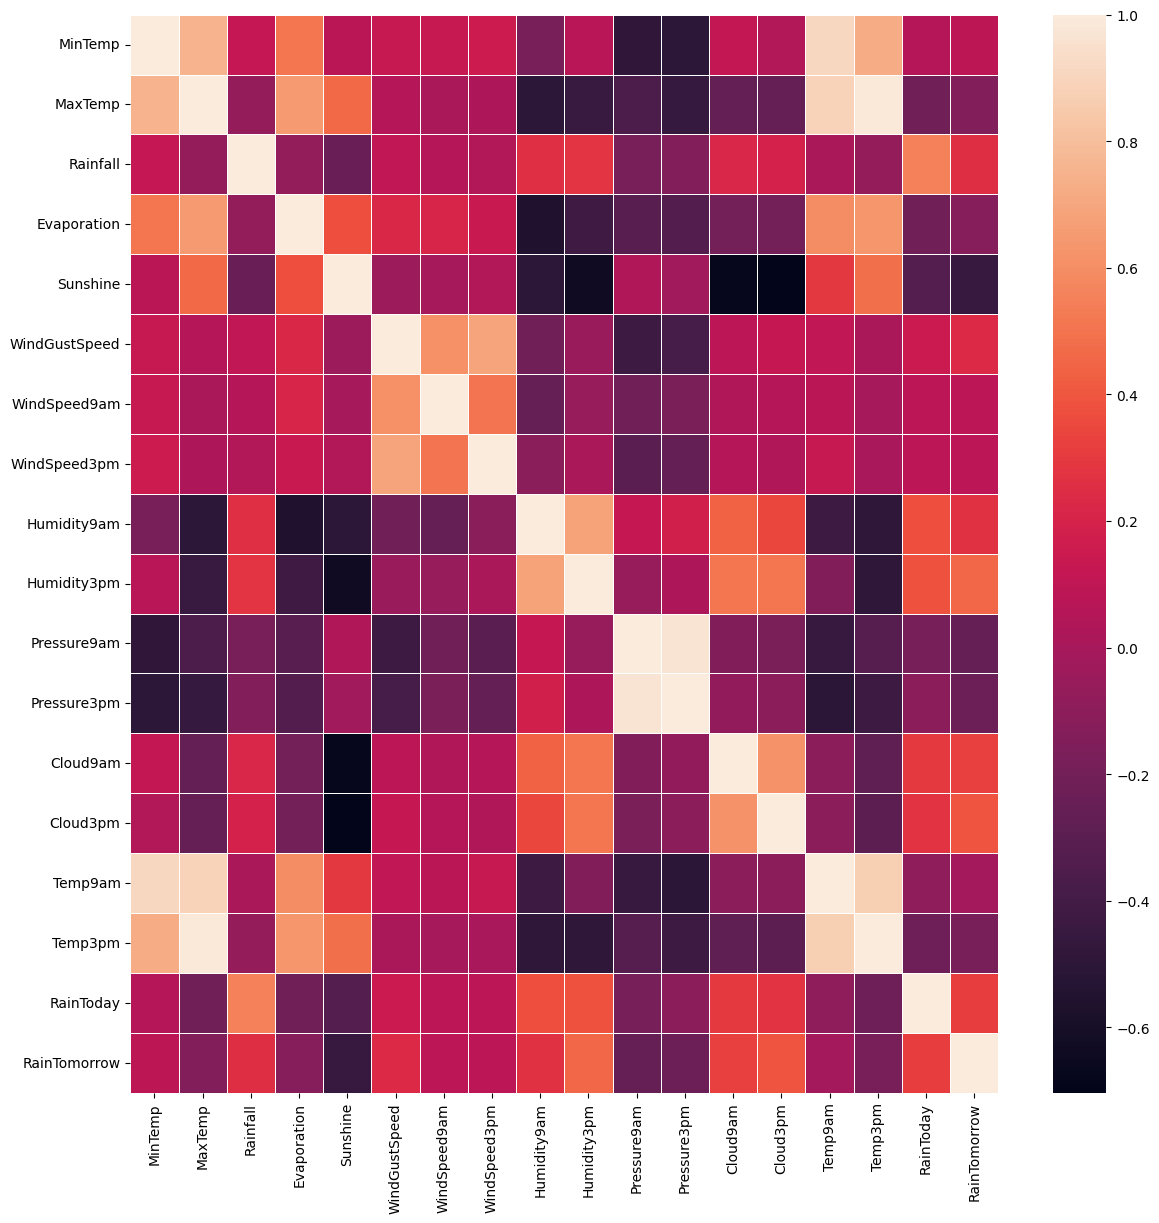

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(rain.corr(), annot=False, linewidths=.5, fmt= '.1f',ax=ax)

# Neural Network: MLP

Utilizes TensorFlow library to create a deep learning model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1], )),  # First hidden layer with 128 neurons and ReLU activation
    Dropout(0.5),
    Dense(32, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dropout(0.5),  
    Dense(1, activation='sigmoid') # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {100*accuracy:.2f}%')


Epoch 1/5
1161/1161 [==============================] - 12s 9ms/step - loss: 0.4065 - accuracy: 0.8174 - val_loss: 0.3430 - val_accuracy: 0.8547
Epoch 2/5
1161/1161 [==============================] - 12s 10ms/step - loss: 0.3559 - accuracy: 0.8484 - val_loss: 0.3331 - val_accuracy: 0.8588
Epoch 3/5
 574/1161 [=============>................] - ETA: 5s - loss: 0.3464 - accuracy: 0.8535

KeyboardInterrupt: 

## Improving MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(optimizer='adam', activation='relu', neurons=64, dropout_rate=0.5):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons/2, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# Define the hyperparameter grid
param_grid = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 64, 128],
    'dropout_rate': [0.3, 0.5, 0.7],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}
grid = HalvingGridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_macro', n_jobs=1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

C:\Users\Mitt\AppData\Local\Temp\ipykernel_11104\2427556961.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


967/967 [==============================] - 3s 3ms/step
Best: 0.7732693478440339 using {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'neurons': 64, 'optimizer': 'rmsprop'}


# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train a decision tree classifier with default parameters
DTC = DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)

# Evaluate the classifier on the training set
train_set_predict = DTC.predict(X_train_scaled)
train_set_accuracy = accuracy_score(y_train, train_set_predict)
print(f"Train Accuracy: {train_set_accuracy}\n")

# Evaluate the classifier on the testing set
test_set_predict = DTC.predict(X_test_scaled)
test_set_accuracy = accuracy_score(y_test, test_set_predict)
print(f"Test Accuracy: {test_set_accuracy}\n")


# Visualize the learned tree
""" use plot_tree from sklearn.tree """
#plt.figure(figsize=(20,15))
#plot_tree(DTC, filled=True)
#plt.show()

Train Accuracy: 1.0

Test Accuracy: 0.7961406518010291



' use plot_tree from sklearn.tree '

# Naive Bayesian 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier
NBC_model = GaussianNB()

NBC_model.fit(X_train_scaled, y_train)

predicted = NBC_model.predict(X_test_scaled)

accuracy = accuracy_score(predicted, y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.804631217838765


# Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Comparison with SVM Classifiers: apply linear and a non-linear SVM classifiers
linear_svm = LinearSVC()

linear_svm.fit(X_train_scaled, y_train)

prediction = linear_svm.predict(X_test_scaled)
linear_svm_accuracy = accuracy_score(y_test, prediction)
print("Linear SVM Accuracy:", linear_svm_accuracy)

#HalvingGridSearchCV use this
# Task 4: Hyperparameter Tuning : Use GridSearchCV to find the best hyperparameters and print them out
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
##grid_search = 0 

Linear SVM Accuracy: 0.8527444253859349


# Simple Logistics Regression

In [ ]:
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression();

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

clf.fit(X_train_scaled, y_train)


(46430, 17) (46430,)
(11660, 17) (11660,)


LogisticRegression()

In [ ]:
# Print accuracy
LR_predictions = clf.predict(X_test_scaled)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_test, LR_predictions) + np.dot(1 - y_test,1 - LR_predictions)) / float(y_test.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


# Ensemble methods: Bagging

Training Bagging...
[[8619  463]
 [1218 1360]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      9082
         1.0       0.75      0.53      0.62      2578

    accuracy                           0.86     11660
   macro avg       0.81      0.74      0.76     11660
weighted avg       0.85      0.86      0.85     11660



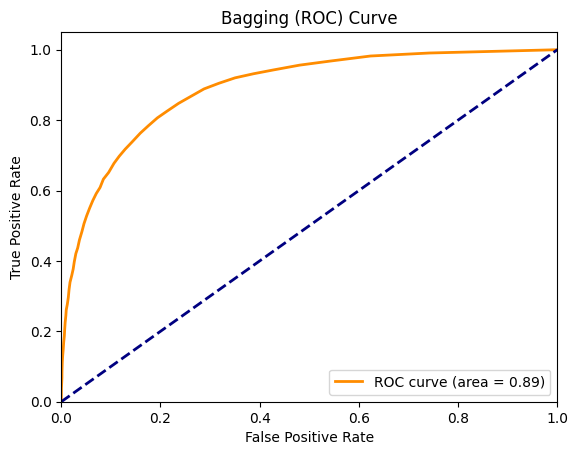

In [ ]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    #train and predict for each model
    clf.fit(X_train_scaled, y_train)

    # Predict probabilities for the test data
    prediction = clf.predict(X_test_scaled)
    y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]
    #y_pred_class = np.where(y_pred_prob >= 0.5, 1, 0)
        
    # Compute evaluation metrics
    confuse_matrix = confusion_matrix(y_test, prediction)

    print(confuse_matrix)

    class_report = classification_report(y_test, prediction)

    print(class_report)

    # Compute ROC curve

    #Calculates fpr and tpr
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    #Computes area under the curve
    roc_auc = auc(fpr,tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} (ROC) Curve'.format(name))
    plt.legend(loc="lower right")
    plt.show()

# This is the Pre-processing data without encoding categorical values

In [ ]:
# Read the data
X_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv", delimiter=',')
X_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_train.csv", delimiter=',')
y_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_test.csv", delimiter=',')
y_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_train.csv", delimiter=',')


# Replace 'Yes' and 'No' with 1 and 0
y_train['RainTomorrow'] = y_train['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test['RainTomorrow'] = y_test['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Drop rows with missing values in y_train and get the indices of remaining rows
y_train = y_train.dropna()
train_indices = y_train.index

# Select rows in X_train with the same indices
X_train_select = X_train.iloc[train_indices]

# Repeat for the test set
y_test = y_test.dropna()
test_indices = y_test.index
X_test_select = X_test.loc[test_indices]

#Drop date column
X_train_select.drop(columns=['Date'], axis=1, inplace=True)
X_test_select.drop(columns=['Date'], axis=1, inplace=True)

#Drop categorical columns for now
X_train_select.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)
X_test_select.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)

#Drop features with no strong correlation with other features
X_train_select.drop(columns=['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],axis=1, inplace=True)
X_test_select.drop(columns=['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],axis=1, inplace=True)

# Drop columns that are not in the selected features
#X_train = X_train[selected_features]
#X_test = X_test[selected_features]

features = X_train_select.columns

# Checks to see if there are the same number of rows

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

"""# Impute missing values in categorical variables
cat_imputer = SimpleImputer(strategy='most_frequent')

# Select categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# One-Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure both training and test dataframes have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)"""

# Impute missing values in numerical variables
num_imputer = SimpleImputer(strategy='mean')

# Select numerical columns
#num_cols = X_train.select_dtypes(include=[np.number]).columns
num_imputer.fit(X_train_select)

X_train_imputed = num_imputer.transform(X_train_select)
X_test_imputed = num_imputer.transform(X_test_select)

X_train_df = pd.DataFrame(X_train_imputed, columns=features)
X_test_df = pd.DataFrame(X_test_imputed, columns=features)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

features = X_train_select.columns

print(X_train_df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv'

# This is the Data pre-processing with encoding categorical values

In [ ]:
# Read the data
X_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_test.csv", delimiter=',').head(20000)
X_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_X_train.csv", delimiter=',').head(1000)
y_test = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_test.csv", delimiter=',').head(20000)
y_train = pd.read_csv("/Users/timnguyen/Desktop/Machine_Learning/Final-Project/weatherAUS_y_train.csv", delimiter=',').head(1000)

#Drop 'Date' and 'Location' from encoded datasets if they are not needed
X_train.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)
X_test.drop(columns=['Date', 'Location'], errors='ignore', inplace=True)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

#Drop missing values from feature datasets
X_train_cleaned = X_train.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
X_test_cleaned = X_test.dropna(subset=numerical_features.tolist() + ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

#Convert 'Yes'/'No' to Binary values in cleaned datasets for 'RainToday'
X_train_cleaned['RainToday'] = X_train_cleaned['RainToday'].map({'Yes': 1, 'No': 0})
X_test_cleaned['RainToday'] = X_test_cleaned['RainToday'].map({'Yes': 1, 'No': 0})

#Apply one-hot encoding to the categorical columns in both training and testing datasets
X_train_encoded = pd.get_dummies(X_train_cleaned, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test_cleaned, columns=categorical_cols)

#Ensure both datasets have the same dummy variables, filling with 0 where categories do not match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

#Align Y_train and Y_test with the indices of cleaned and encoded feature datasets
y_train_aligned = y_train.loc[X_train_encoded.index].copy()
y_test_aligned = y_test.loc[X_test_encoded.index].copy()

#Convert 'Yes'/'No' to Binary values in Y_train_aligned and Y_test_aligned
y_train_aligned['RainTomorrow'] = y_train_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})
y_test_aligned['RainTomorrow'] = y_test_aligned['RainTomorrow'].map({'Yes': 1, 'No': 0})

#Drop any remaining missing values in the target datasets
y_train_aligned.dropna(subset=['RainTomorrow'], inplace=True)
y_test_aligned.dropna(subset=['RainTomorrow'], inplace=True)

y_train = y_train_aligned
y_test = y_test_aligned

# Convert column vectors to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#Realign the feature datasets to match the new indices of the target datasets
X_train_encoded = X_train_encoded.loc[y_train_aligned.index]
X_test_encoded = X_test_encoded.loc[y_test_aligned.index]

#Get feature names
features = X_train_encoded.columns

#Standardize the feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#Print shapes of the datasets
print(X_train_scaled.shape)
print(X_test_scaled.shape)
